In [19]:
import pandas as pd
datos = pd.read_csv('./housing.csv')
datos = datos.dropna()
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'room_density'}>,
        <Axes: title={'center': 'bedrooms_per_rooms'}>,
        <Axes: title={'center': 'income_per_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>],
       [<Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>]], dtype=object)

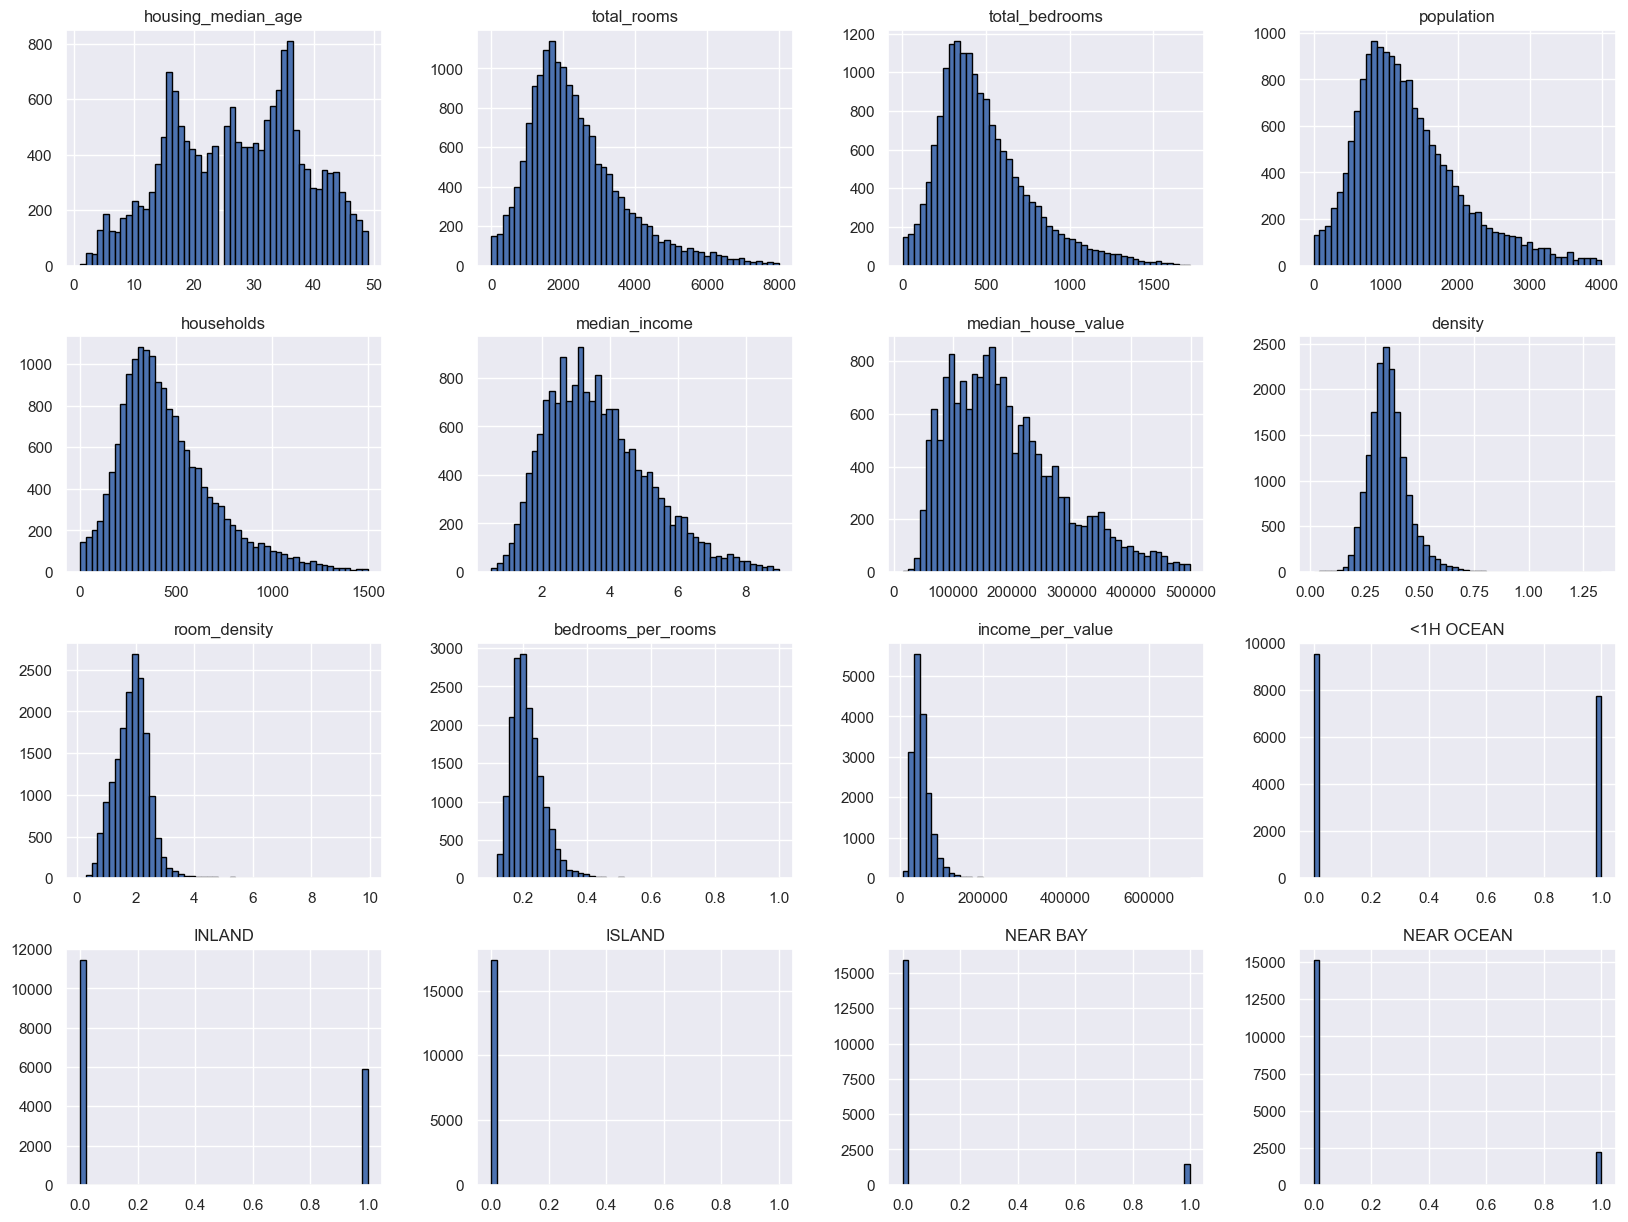

In [20]:



datos = datos[datos["housing_median_age"] < 50]
datos = datos[datos["median_house_value"] < 500000]
datos = datos[datos["total_bedrooms"] < 1750]
datos = datos[datos["total_rooms"] < 8000]
datos = datos[datos["households"] < 1500]
datos = datos[datos["median_income"] < 9]


datos = datos[datos["population"] < 4000]


datos["density"] = datos["households"] / datos["population"]
datos["room_density"] = datos["total_rooms"] / datos["population"]
datos["bedrooms_per_rooms"] = datos["total_bedrooms"] / datos["total_rooms"]
datos["income_per_value"] = datos["median_house_value"] / datos["median_income"]

datos = datos[datos["room_density"] < 10]

datos['ocean_proximity'].value_counts()
dummies = pd.get_dummies(datos['ocean_proximity'], dtype=int)
datos = pd.concat([datos, dummies], axis=1)
datos.drop('ocean_proximity', axis=1, inplace=True)

datos = datos.drop(['latitude', 'longitude'], axis=1)

datos.hist(bins=50, figsize=(20,15), edgecolor='black')


<Axes: >

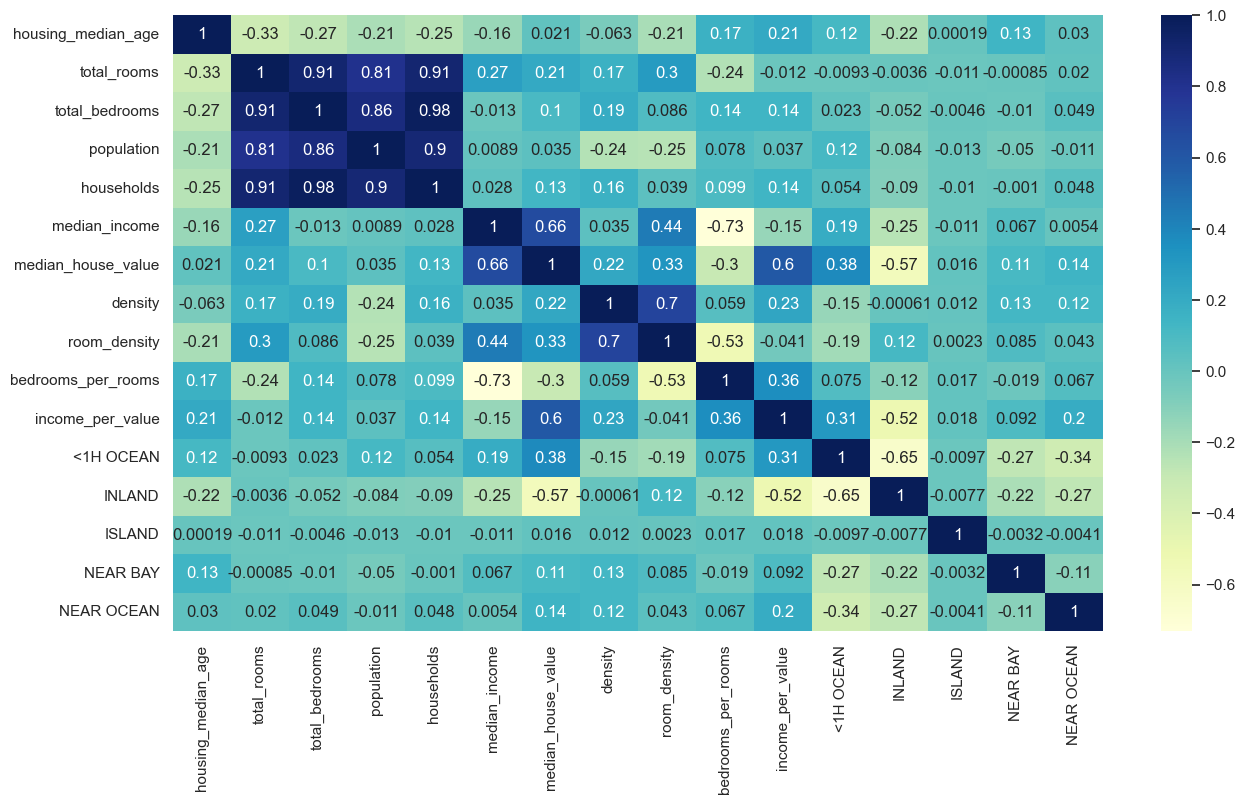

In [21]:
import seaborn as sb

sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos.corr('spearman'), annot=True, cmap='YlGnBu' )

array([[<Axes: title={'center': 'predicciones'}>,
        <Axes: title={'center': 'valor real'}>],
       [<Axes: title={'center': 'diferencia'}>, <Axes: >]], dtype=object)

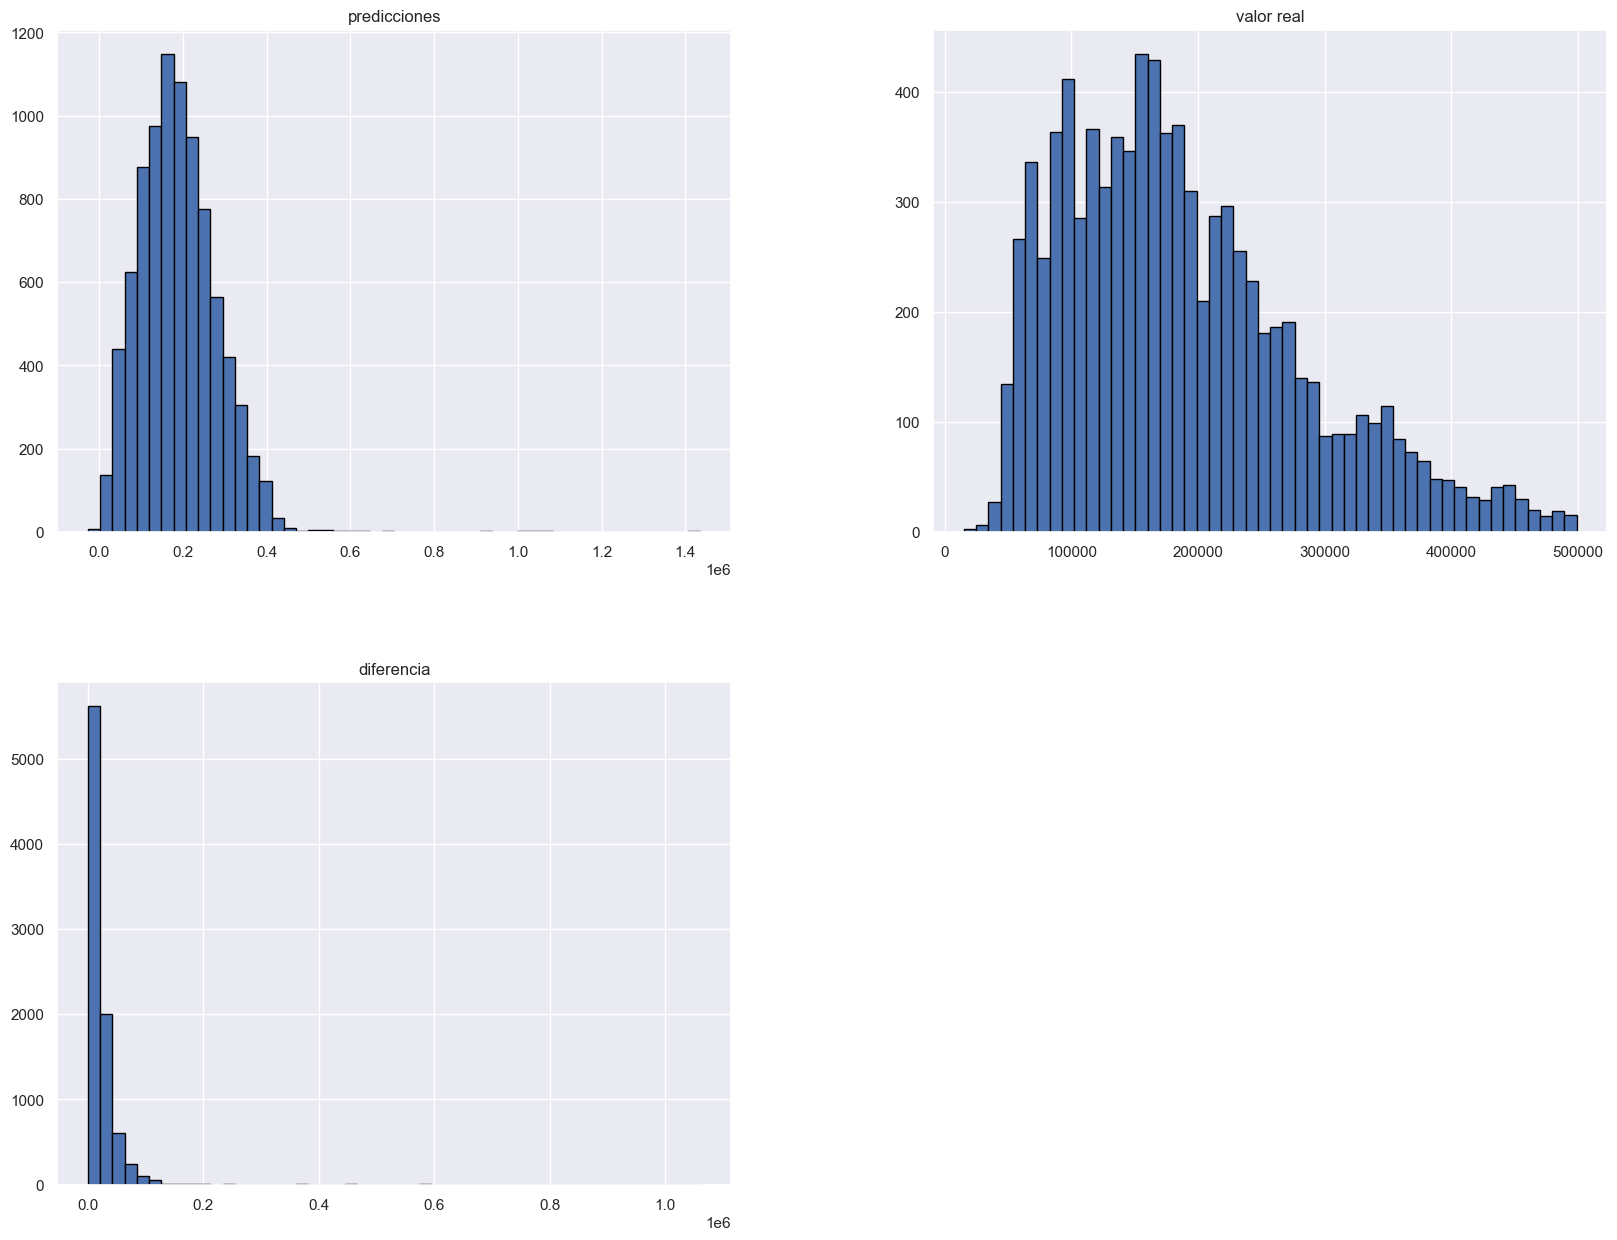

In [22]:
y  = datos['median_house_value']
X = datos.drop('median_house_value', axis=1) #axis = 1, para eliminar la columna
     

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.linear_model import LinearRegression
modelo = LinearRegression(positive=True)

# #entrenamiento
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)


comparativa = {"predicciones": predicciones, "valor real": y_test, "diferencia": round(abs(y_test - predicciones))}
result = pd.DataFrame(comparativa)
result = result.sort_values(by="diferencia")
result.to_csv("resultado.csv")
result.hist(bins=50, figsize=(20,15), edgecolor='black')



In [23]:
modelo.score(X_test, y_test)

0.8462190664766445

In [24]:
modelo.score(X_train, y_train)

0.8702460409722534